# Ridge Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.linear_model import  Ridge, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
df = pd.read_csv('Data/Hitters.csv', index_col=0).dropna()
dummies = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df.Salary
X_ = df.drop(['Salary','League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
list_numerical=X_train.columns[:16]
scaler = StandardScaler().fit(X_train[list_numerical]) 
X_train[list_numerical] = scaler.transform(X_train[list_numerical])
X_test[list_numerical] = scaler.transform(X_test[list_numerical])

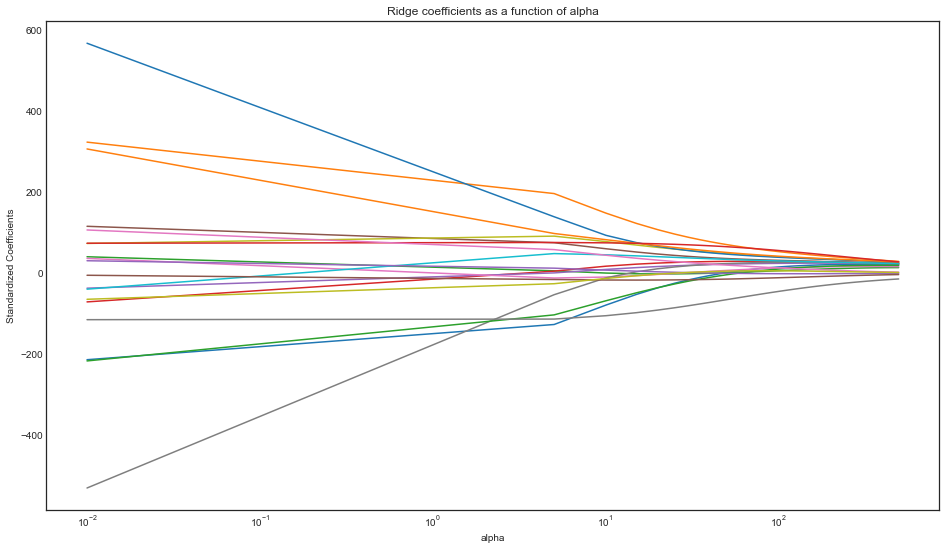

In [3]:
alphas = np.linspace(0.01,500,100)
ridge = Ridge()
coefs = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
plt.figure(figsize=(16,9))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Ridge coefficients as a function of alpha')
plt.show()

In [4]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)
train_index=[]
validation_index=[]
for i, (t_index, v_index) in enumerate(kf.split(X_train,y_train)):
    train_index.append(t_index)
    validation_index.append(v_index)

In [5]:
alphas = np.linspace(0.01,500,100)

In [6]:
def Test_MSE(x_train,y_train,x_test,y_test,a):
    model=Ridge(alpha=a)
    model.fit(x_train,y_train)
    mse=mean_squared_error(model.predict(x_test),y_test)
    return mse

In [7]:
def Validation_MSE(X_train,y_train,train_index,validation_index,a):
    mse=[]
    for i in range(len(train_index)): 
        t_index= train_index[i]
        v_index=validation_index[i]
        error=Test_MSE(X_train.iloc[t_index],y_train.iloc[t_index], 
                      X_train.iloc[v_index],y_train.iloc[v_index],a)
        mse.append(error)
    return mse

In [8]:
loss=[]
for a in alphas:
    mse=Validation_MSE(X_train,y_train,train_index,validation_index,a)
    loss.append(mse)

In [9]:
mse_alpha=np.array(loss).reshape(100,5).mean(axis=1)
best_alpha=alphas[np.argmin(mse_alpha)]
print('best alpha: ',best_alpha.round(2))

best alpha:  141.42


In [10]:
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train, y_train)
print('R squared training set', round(ridge_best.score(X_train, y_train)*100, 2))
print('R squared test set', round(ridge_best.score(X_test, y_test)*100, 2))
print('Mean squared error training set',mean_squared_error(y_train, ridge_best.predict(X_train)).round(2))
print('Mean squared error test set',mean_squared_error(y_test, ridge_best.predict(X_test)).round(2))

R squared training set 51.75
R squared test set 17.68
Mean squared error training set 100331.0
Mean squared error test set 148899.2


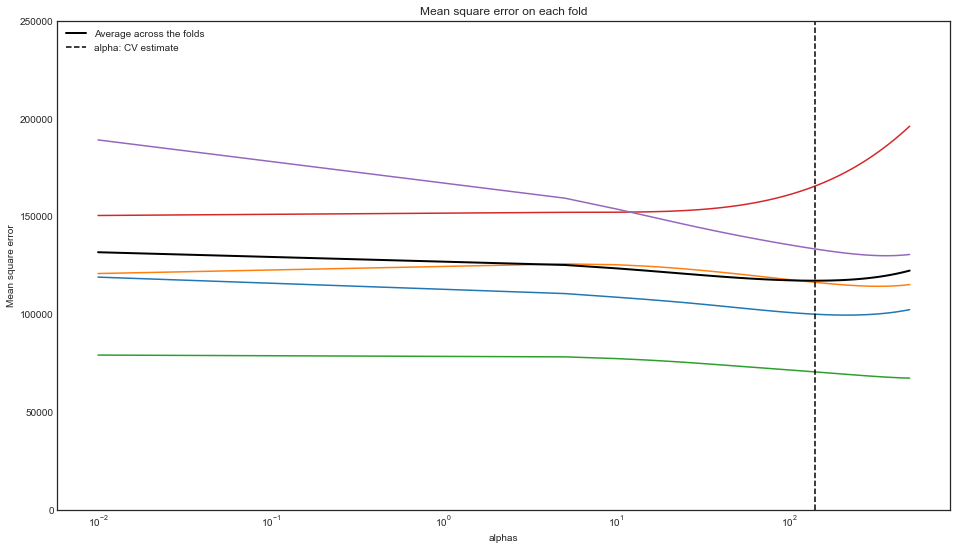

In [13]:
plt.figure(figsize=(16,9))
plt.semilogx(alphas,loss)
plt.plot(
    alphas ,
    np.array(loss).reshape(100,5).mean(axis=1),"k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(best_alpha, linestyle="--", color="k", label="alpha: CV estimate")
plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight")
ymin, ymax = 0, 250000
plt.ylim(ymin, ymax)
plt.show()

In [12]:
model = RidgeCV(cv=5,alphas=alphas)
model.fit(X_train, y_train)
model.alpha_

131.32050505050503